In [1]:
import os, shutil

In [2]:
original_dataset_dir = 'data/original/train'

base_dir = 'data/cats_and_dogs'
if not os.path.exists(base_dir):
    os.mkdir(base_dir)
    
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

In [3]:
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

In [4]:
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

In [5]:
fnames = ['cat.{}.jpg'.format(i) for i in range(10000)] # filename list로 만들기
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

In [6]:
fnames = ['cat.{}.jpg'.format(i) for i in range(10000, 12500)] 
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

In [7]:
fnames = ['dog.{}.jpg'.format(i) for i in range(10000)] 
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [8]:
fnames = ['dog.{}.jpg'.format(i) for i in range(10000, 12500)] 
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [9]:
#데이터 검증
print('훈련용 고양이 이미지 전체 개수:', 
      len(os.listdir(train_cats_dir)))
print('훈련용 강아지 이미지 전체 개수:', 
      len(os.listdir(train_dogs_dir)))
print('테스트용 고양이 이미지 전체 개수:', 
      len(os.listdir(test_cats_dir)))
print('테스트용 강아지 이미지 전체 개수:', 
      len(os.listdir(test_dogs_dir)))

훈련용 고양이 이미지 전체 개수: 10000
훈련용 강아지 이미지 전체 개수: 10000
테스트용 고양이 이미지 전체 개수: 2500
테스트용 강아지 이미지 전체 개수: 2500


In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

In [11]:
model = Sequential()
model.add(layers.Conv2D(32, (3,3), input_shape=(150, 150, 3), activation='relu'))
#32*9+32 
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

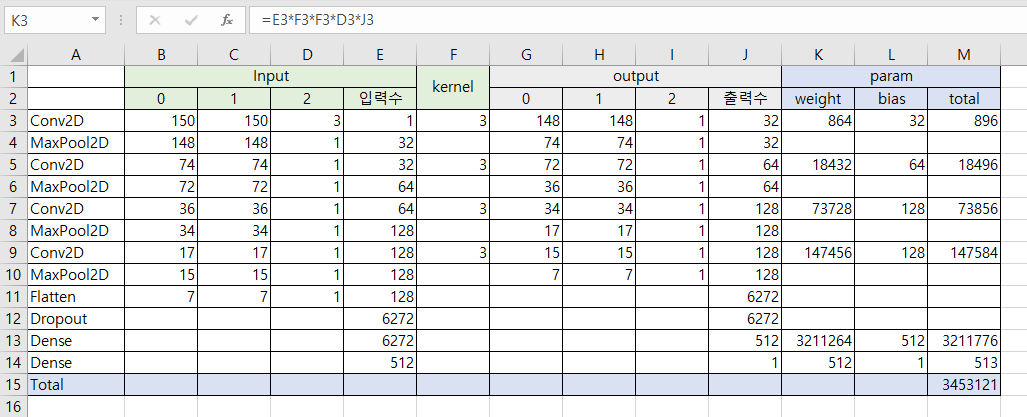

In [13]:
model.compile(loss='binary_crossentropy', optimizer='adam',
             metrics=['accuracy'])

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                   target_size=(150, 150),
                                                   batch_size=20,
                                                   class_mode='binary')
# binary 첫번째 폴더를 0 두번째 폴더를 1 로 자동으로 매핑.. 인식한답

validation_generator = test_datagen.flow_from_directory(test_dir,
                                                   target_size=(150, 150),
                                                   batch_size=20,
                                                   class_mode='binary')

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


데이터가 2만개인데 batch_size가 20이므로 1000으로 찍힌다.

In [18]:
history = model.fit(train_generator, epochs=30,
                   validation_data=validation_generator)

Epoch 1/30
1000/1000 [==============================] - 478s 478ms/step - loss: 0.6891 - accuracy: 0.5283 - val_loss: 0.6646 - val_accuracy: 0.5842
Epoch 2/30
1000/1000 [==============================] - 390s 390ms/step - loss: 0.6116 - accuracy: 0.6614 - val_loss: 0.5363 - val_accuracy: 0.7382
Epoch 3/30
1000/1000 [==============================] - 392s 392ms/step - loss: 0.5065 - accuracy: 0.7485 - val_loss: 0.4421 - val_accuracy: 0.7976
Epoch 4/30
1000/1000 [==============================] - 458s 458ms/step - loss: 0.4361 - accuracy: 0.7986 - val_loss: 0.4008 - val_accuracy: 0.8184
Epoch 5/30
1000/1000 [==============================] - 418s 418ms/step - loss: 0.3818 - accuracy: 0.8293 - val_loss: 0.3769 - val_accuracy: 0.8294
Epoch 6/30
1000/1000 [==============================] - 456s 456ms/step - loss: 0.3361 - accuracy: 0.8555 - val_loss: 0.3294 - val_accuracy: 0.8596
Epoch 7/30
1000/1000 [==============================] - 413s 413ms/step - loss: 0.2918 - accuracy: 0.8766 - val_

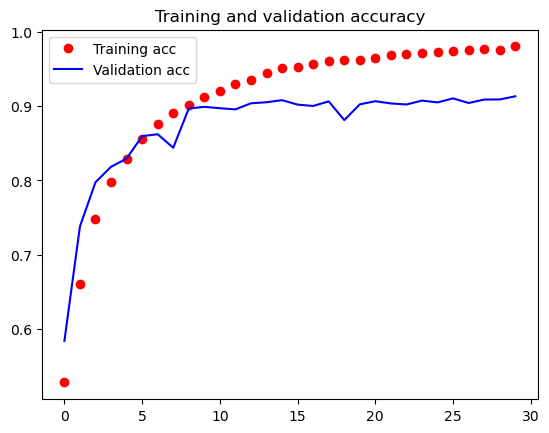

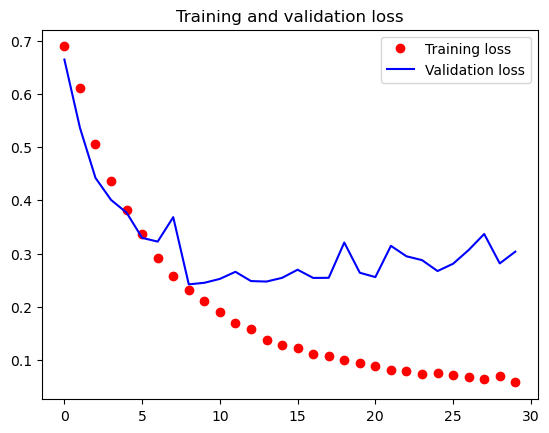

In [19]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'ro', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()